In [30]:
# importing required libraries to analyze the housing data

import pandas as pd # "Panel Data" package. used for data manipulationd and analysis
import numpy as np # "Numerical Python" used for dealing with large arrays and perform mathematical operations
import matplotlib.pyplot as plt # visualization library. helps edit figures and graphs for better understanding 
%matplotlib inline 
# using the inline command helps include the graphs directly inside the notebook next to the code. 
import seaborn as sns # based on matplotlib library. Provides a high level interface for drawing attractive figures and 
# graphs

# setting the option to display max no.of rows as it helps view dataframes better
pd.pandas.set_option('display.max_columns', None)

In [31]:
# reading the data (csv file)
RE = pd.read_csv("USA Real Estate.csv")

# shape of data 
print(RE.shape) # ~ 733,000 rows with 12 columns

(733159, 12)


In [32]:
# adding an ID column to make things easier when plotting data 
RE['id'] = RE.index +1 
RE

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date,id
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,NaN,1
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaN,2
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,NaN,3
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,NaN,4
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
733154,for_sale,748000.0,4.0,3.0,0.14,"8 Lewis Dr, Bridgewater Twp, NJ, 08807",8 Lewis Dr,Bridgewater Twp,New Jersey,8807.0,NaN,2002-05-16,733155
733155,for_sale,649000.0,4.0,3.0,1.04,"11 Buttonwood Ct, Montgomery Twp, NJ, 08502",11 Buttonwood Ct,Montgomery Twp,New Jersey,8502.0,NaN,1993-11-12,733156
733156,for_sale,300000.0,2.0,2.0,0.02,"387 Rittenhouse Ct, North Brunswick, NJ, 08902",387 Rittenhouse Ct,North Brunswick,New Jersey,8902.0,NaN,2009-07-01,733157
733157,for_sale,499900.0,3.0,3.0,0.28,"21 Tripplet Rd, Franklin Twp, NJ, 08873",21 Tripplet Rd,Franklin Twp,New Jersey,8873.0,2016.0,2005-10-17,733158


In [33]:
# checking out a glimpse of the dataset

RE.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date,id
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,NaN,1
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaN,2
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,NaN,3
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,NaN,4
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,NaN,NaN,5


In [34]:
 # checking for presence of null values
RE.isna().sum()

# revealed a pretty considerable amount of null values in the dataset. 

status               0
price               71
bed             115982
bath            111752
acre_lot        160781
full_address         0
street            1090
city                72
state                0
zip_code           202
house_size      212387
sold_date       385922
id                   0
dtype: int64

In [35]:
RE[RE['sold_date'].isna()] # seems to be the case that some houses are still on sale and have not been sold. Just in 
# case, we need to verify if the sold_date data is only missing when the status of the house is 'for_sale'

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date,id
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,NaN,1
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaN,2
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,NaN,3
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,NaN,4
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
733131,for_sale,170000.0,1.0,1.0,NaN,"40 Norwich Pl, Franklin Twp, NJ, 08873",40 Norwich Pl,Franklin Twp,New Jersey,8873.0,NaN,NaN,733132
733133,for_sale,475000.0,4.0,3.0,0.23,"16 Oak Tree Rd, South Brunswick, NJ, 08852",16 Oak Tree Rd,South Brunswick,New Jersey,8852.0,2252.0,NaN,733134
733137,for_sale,319000.0,2.0,3.0,NaN,"32-22 Bloomingdale Dr, Hillsborough Twp, NJ, 0...",32-22 Bloomingdale Dr,Hillsborough Twp,New Jersey,8844.0,NaN,NaN,733138
733141,for_sale,475000.0,3.0,3.0,0.52,"1611 Long Hill Rd, Long Hill Township, NJ, 07946",1611 Long Hill Rd,Long Hill Township,New Jersey,7946.0,NaN,NaN,733142


In [36]:
RE[RE['bath'].isna()] # the head and tail of the dataset seem to allude to a relationship between the missing values of
# bed and bath column. Will need to verify that. 

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date,id
42,for_sale,400000.0,NaN,NaN,0.99,"Carretera 111 Km 12 6 Barrio Capa Moca, Moca, ...",Carretera 111 Km 12 6 Barrio Capa Moca,Moca,Puerto Rico,676.0,43082.0,NaN,43
43,for_sale,380000.0,NaN,NaN,18.45,Calle N Finca De 19 Cuerdas En El Bo Campo Ale...,Calle N Finca De 19 Cuerdas En El Bo Campo Ale...,Hatillo,Puerto Rico,659.0,NaN,NaN,44
59,for_sale,35000.0,NaN,NaN,0.88,"4416 K 1 8 Bo Naranjo, Aguada, PR, 00602",4416 K 1 8 Bo Naranjo,Aguada,Puerto Rico,602.0,NaN,NaN,60
60,for_sale,58000.0,NaN,NaN,0.21,"Solar 9 Carr # 416, Aguada, PR, 00602",Solar 9 Carr # 416,Aguada,Puerto Rico,602.0,NaN,NaN,61
61,for_sale,85000.0,NaN,NaN,21.08,"417 Km 0 6 Piedras Blancas, Aguada, PR, 00602",417 Km 0 6 Piedras Blancas,Aguada,Puerto Rico,602.0,NaN,NaN,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...
733083,for_sale,424900.0,NaN,NaN,0.14,"220 2nd St, Dunellen, NJ, 08812",220 2nd St,Dunellen,New Jersey,8812.0,1489.0,2021-07-14,733084
733086,for_sale,585000.0,NaN,NaN,NaN,"503 Lincoln Ave, Dunellen, NJ, 08812",503 Lincoln Ave,Dunellen,New Jersey,8812.0,1911.0,2012-09-06,733087
733088,for_sale,499000.0,NaN,NaN,0.15,"218 Rutgers St, New Brunswick, NJ, 08901",218 Rutgers St,New Brunswick,New Jersey,8901.0,2232.0,NaN,733089
733128,for_sale,199900.0,NaN,NaN,0.23,"403 E St, Middlesex, NJ, 08846",403 E St,Middlesex,New Jersey,8846.0,NaN,NaN,733129


In [37]:
RE[RE['acre_lot'].isna()]

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date,id
23,for_sale,115000.0,3.0,2.0,NaN,"17 Estancias Del Madrigal Apt 326, Ponce, PR, ...",17 Estancias Del Madrigal Apt 326,Ponce,Puerto Rico,716.0,1148.0,NaN,24
51,for_sale,160000.0,2.0,1.0,NaN,"B15 Carr 115 Km 24 1 Int Unit B15, Aguada, PR,...",B15 Carr 115 Km 24 1 Int Unit B15,Aguada,Puerto Rico,602.0,813.0,NaN,52
63,for_sale,720000.0,3.0,3.0,NaN,"8 Carr 115 Bo Guayabo Unit Dn, Aguada, PR, 00602",8 Carr 115 Bo Guayabo Unit Dn,Aguada,Puerto Rico,602.0,2715.0,NaN,64
72,for_sale,189000.0,2.0,1.0,NaN,"Km2 1 Carr # 442, Aguada, PR, 00602",Km2 1 Carr # 442,Aguada,Puerto Rico,602.0,951.0,NaN,73
132,for_sale,46900.0,3.0,1.0,NaN,"8R Calle Balboa Unit 9A, Mayaguez, PR, 00680",8R Calle Balboa Unit 9A,Mayaguez,Puerto Rico,680.0,982.0,NaN,133
...,...,...,...,...,...,...,...,...,...,...,...,...,...
733132,for_sale,139000.0,2.0,1.0,NaN,"56 Gramercy Gdns Unit 56B, Middlesex, NJ, 08846",56 Gramercy Gdns Unit 56B,Middlesex,New Jersey,8846.0,NaN,2020-01-17,733133
733137,for_sale,319000.0,2.0,3.0,NaN,"32-22 Bloomingdale Dr, Hillsborough Twp, NJ, 0...",32-22 Bloomingdale Dr,Hillsborough Twp,New Jersey,8844.0,NaN,NaN,733138
733142,for_sale,275000.0,2.0,2.0,NaN,"1006 Breckenridge Dr Unit 1006, Branchburg Tow...",1006 Breckenridge Dr Unit 1006,Branchburg Township,New Jersey,8876.0,1138.0,2019-07-02,733143
733149,for_sale,296000.0,2.0,2.0,NaN,"74 Baldwin Ct, Bernards Twp, NJ, 07920",74 Baldwin Ct,Bernards Twp,New Jersey,7920.0,1100.0,2013-01-10,733150


In [38]:
RE[RE['house_size'].isna()] # glimpse of tail and head seems to suggest a relationship between location and house size 
# with regards to null values. will need to verify that. 

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date,id
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,NaN,NaN,5
43,for_sale,380000.0,NaN,NaN,18.45,Calle N Finca De 19 Cuerdas En El Bo Campo Ale...,Calle N Finca De 19 Cuerdas En El Bo Campo Ale...,Hatillo,Puerto Rico,659.0,NaN,NaN,44
59,for_sale,35000.0,NaN,NaN,0.88,"4416 K 1 8 Bo Naranjo, Aguada, PR, 00602",4416 K 1 8 Bo Naranjo,Aguada,Puerto Rico,602.0,NaN,NaN,60
60,for_sale,58000.0,NaN,NaN,0.21,"Solar 9 Carr # 416, Aguada, PR, 00602",Solar 9 Carr # 416,Aguada,Puerto Rico,602.0,NaN,NaN,61
61,for_sale,85000.0,NaN,NaN,21.08,"417 Km 0 6 Piedras Blancas, Aguada, PR, 00602",417 Km 0 6 Piedras Blancas,Aguada,Puerto Rico,602.0,NaN,NaN,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...
733153,for_sale,459000.0,3.0,3.0,0.20,"576 Greenbrook Rd, North Plainfield, NJ, 07063",576 Greenbrook Rd,North Plainfield,New Jersey,7063.0,NaN,2021-01-29,733154
733154,for_sale,748000.0,4.0,3.0,0.14,"8 Lewis Dr, Bridgewater Twp, NJ, 08807",8 Lewis Dr,Bridgewater Twp,New Jersey,8807.0,NaN,2002-05-16,733155
733155,for_sale,649000.0,4.0,3.0,1.04,"11 Buttonwood Ct, Montgomery Twp, NJ, 08502",11 Buttonwood Ct,Montgomery Twp,New Jersey,8502.0,NaN,1993-11-12,733156
733156,for_sale,300000.0,2.0,2.0,0.02,"387 Rittenhouse Ct, North Brunswick, NJ, 08902",387 Rittenhouse Ct,North Brunswick,New Jersey,8902.0,NaN,2009-07-01,733157


In [39]:
# there are missing values in zipcode, city and street. since full address column has no null values, it can be used as
# a refernce to fill in the missing values of these columns. 

# verifying the rows that have missing values in price
RE[RE['price'].isna()] # there seems to be a relationship between status of "ready to build" and price. If houses are not
# built yet, we can't idenify the price right? Still, this discovery needs to be substantiated. 

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date,id
619434,ready_to_build,NaN,4.0,NaN,NaN,"141 Hartford Road, Medford, NJ, 08055",141 Hartford Road,Medford,New Jersey,8055.0,2244.0,NaN,619435
619444,ready_to_build,NaN,3.0,NaN,NaN,"1 Naples Lane, Mount Laurel, NJ, 08054",1 Naples Lane,Mount Laurel,New Jersey,8054.0,2224.0,NaN,619445
619445,ready_to_build,NaN,3.0,NaN,NaN,"1 Naples Lane, Mount Laurel, NJ, 08054",1 Naples Lane,Mount Laurel,New Jersey,8054.0,2270.0,NaN,619446
620249,ready_to_build,NaN,2.0,NaN,NaN,"4300 Bridgeboro Road, Moorestown, NJ, 08057",4300 Bridgeboro Road,Moorestown,New Jersey,8057.0,1748.0,NaN,620250
620325,ready_to_build,NaN,2.0,NaN,NaN,"4300 Bridgeboro Road, Moorestown, NJ, 08057",4300 Bridgeboro Road,Moorestown,New Jersey,8057.0,1865.0,NaN,620326
...,...,...,...,...,...,...,...,...,...,...,...,...,...
685698,ready_to_build,NaN,5.0,NaN,NaN,"1219 Pimpernell Path, Middletown, DE, 19709",1219 Pimpernell Path,Middletown,Delaware,19709.0,2511.0,NaN,685699
685699,ready_to_build,NaN,5.0,NaN,NaN,"1219 Pimpernell Path, Middletown, DE, 19709",1219 Pimpernell Path,Middletown,Delaware,19709.0,2814.0,NaN,685700
701728,ready_to_build,NaN,3.0,NaN,NaN,"Levis Drive & S Martin Ave, Mount Holly, NJ, 0...",Levis Drive & S Martin Ave,Mount Holly,New Jersey,8060.0,2208.0,NaN,701729
702663,ready_to_build,NaN,4.0,NaN,NaN,"141 Hartford Road, Medford, NJ, 08055",141 Hartford Road,Medford,New Jersey,8055.0,2244.0,NaN,702664


In [40]:
# creating a subset of numerical variables. 
RE_subset = RE [['price', 'bed', 'bath', 'acre_lot', 'id']]

# looking at summary statistics of the subset of data. In other words, a sort of detailed glimpse of data. 
RE_subset.describe()

# data seems to be heavily scattered in the acre_lot column. 
# price data is heavily utilizing the scientific notation. It gives a picture of extreme the values are. 
# quickly noting the conversion of scientific notation to real numbers:
# [count: 733,088], [mean: 725,701], [std: 1,768,769], [min: 0], [25%: 237,500], [50%: 419,000], [75%: 725,000], 
# [max: 875,000,000]

# like the acre_lot column, price column data is heavily scattered. it is evident by the overwhelming respective values of 
#  standard deviation in both the columns. In statistics terms, std value of greater than ± 2 (-2 or 2) is considered
# to indicate untrue values. 

# it is also concerning that min price and min acre_lot is zero. Will need to investigate the rows pertaining to these 
# values. perhaps these house that have not yet been built? 

# also, an important thing to remember, NA values have been removed from the count. As a result, the count of values 
# seem inconsistent. 

,price,bed,bath,acre_lot,id
count,7.330880e+05,617177.000000,621407.000000,572378.000000,733159.000000
mean,7.257017e+05,3.422041,2.540473,19.058585,366580.000000
std,1.768769e+06,2.028735,2.002442,1022.007111,211644.917341
min,0.000000e+00,1.000000,1.000000,0.000000,1.000000
25%,2.375000e+05,2.000000,2.000000,0.140000,183290.500000
50%,4.190000e+05,3.000000,2.000000,0.350000,366580.000000
75%,7.250000e+05,4.000000,3.000000,1.380000,549869.500000
max,8.750000e+08,123.000000,198.000000,100000.000000,733159.000000


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bed'}>],
       [<AxesSubplot:title={'center':'bath'}>,
        <AxesSubplot:title={'center':'acre_lot'}>],
       [<AxesSubplot:title={'center':'id'}>, <AxesSubplot:>]],
      dtype=object)

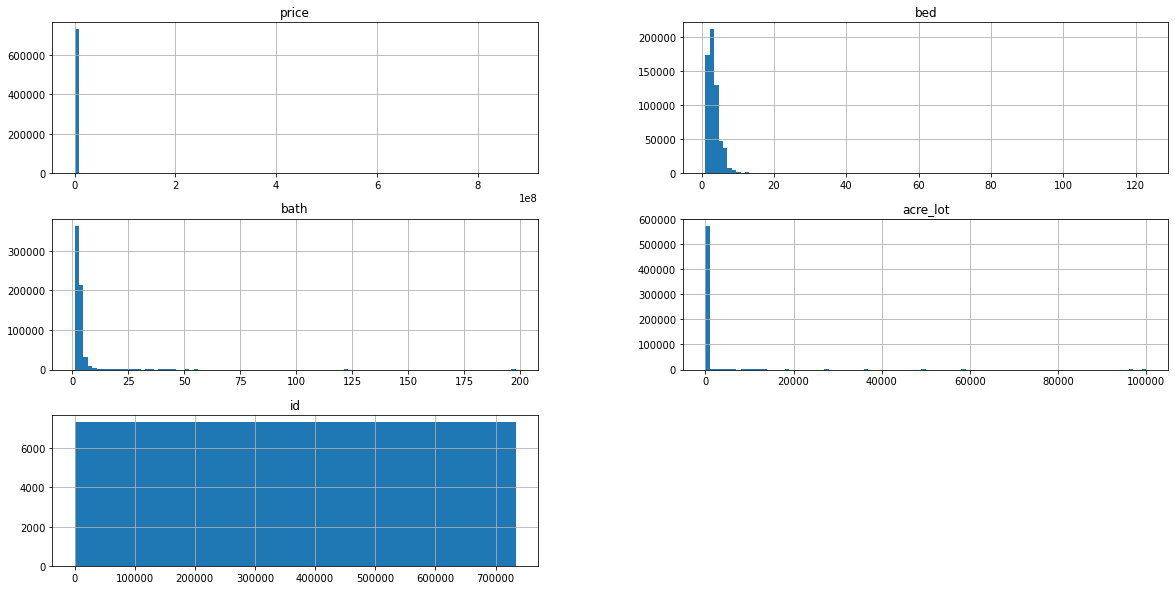

In [41]:
# looking at distribution of values within the columns
RE_subset.hist(bins= 100, figsize=(20, 10))

In [42]:
# presence of seemingly empty bins still indicate that values are are there. However, the count of values in that bin
# could be in single digits.

# checking number of values in other bins
RE_subset[RE_subset['price']> 500000 ] # 292,713 houses with prices above $500,000



,price,bed,bath,acre_lot,id
14,649000.0,5.0,5.0,0.74,15
18,575000.0,3.0,2.0,3.88,19
39,650000.0,9.0,7.0,0.46,40
40,555000.0,5.0,3.0,0.16,41
41,3900000.0,6.0,6.0,0.94,42
...,...,...,...,...,...
733147,629000.0,5.0,2.0,0.06,733148
733148,535000.0,3.0,4.0,0.41,733149
733151,634900.0,3.0,3.0,0.21,733152
733154,748000.0,4.0,3.0,0.14,733155


In [43]:
RE_subset[RE_subset['bed']> 40 ] # 124 houses with more than 40 bedrooms.

,price,bed,bath,acre_lot,id
80518,15150000.0,86.0,56.0,1.32,80519
91412,15150000.0,86.0,56.0,1.32,91413
93208,15150000.0,86.0,56.0,1.32,93209
96226,15150000.0,86.0,56.0,1.32,96227
97294,15150000.0,86.0,56.0,1.32,97295
...,...,...,...,...,...
557920,19995000.0,46.0,46.0,NaN,557921
672965,1399000.0,47.0,39.0,0.32,672966
674558,1399000.0,47.0,39.0,0.32,674559
675848,1399000.0,47.0,39.0,0.32,675849


In [44]:
RE_subset[RE_subset['acre_lot']> 20000 ] # 78 houses with more than 20,000 acres. 

,price,bed,bath,acre_lot,id
18822,585000.0,4.0,4.0,100000.00,18823
30265,150000.0,NaN,NaN,99999.00,30266
42028,150000.0,NaN,NaN,99999.00,42029
45462,150000.0,NaN,NaN,99999.00,45463
59393,5700000.0,NaN,NaN,99999.00,59394
...,...,...,...,...,...
714619,54900.0,NaN,NaN,27610.00,714620
716642,449000.0,4.0,3.0,36914.83,716643
722656,485000.0,4.0,3.0,100000.00,722657
722666,520000.0,NaN,NaN,49299.44,722667


In [45]:
Big_bed = RE_subset[RE_subset['bed']> 40 ] # 124 houses with more than 40 bedrooms.
Big_acre = RE_subset[RE_subset['acre_lot']> 20000 ] # 78 houses with more than 20,000 acres. 


<AxesSubplot:xlabel='id', ylabel='bed'>

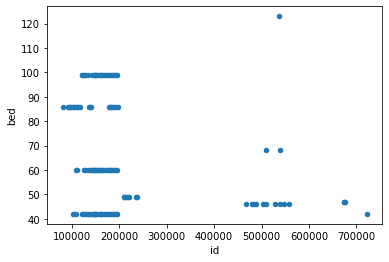

In [47]:
Big_bed.plot(kind = 'scatter', x = 'id', y = 'bed')

<AxesSubplot:xlabel='id', ylabel='bed'>

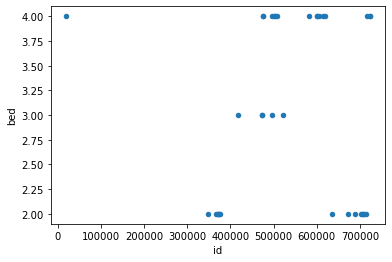

In [48]:
Big_acre.plot(kind = 'scatter', x = 'id', y = 'bed' )

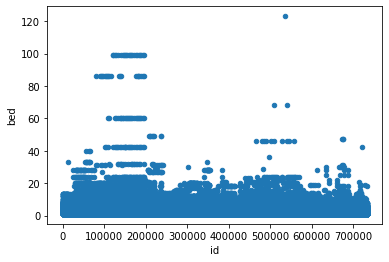

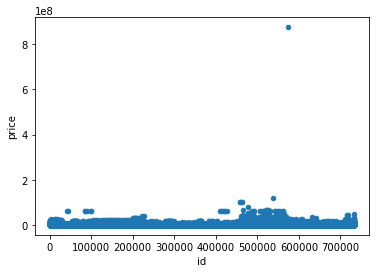

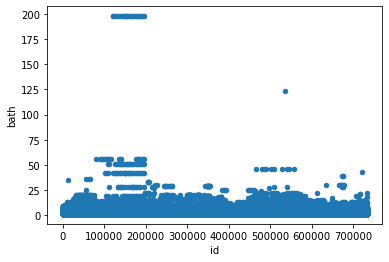

In [54]:
# the above scatter plots show the location of the invisible values within the empty bins in the previous histogram.
# To get a bigger picture, it would be valuable to display a scatterplot of all the values in the column. 

RE.plot(kind = 'scatter', x = 'id', y = 'bed') # you can see most of the data is concentrated to below 40. 
plt.show()
RE.plot(kind = 'scatter', x = 'id', y = 'price')
plt.show()
RE.plot(kind = 'scatter', x = 'id', y = 'bath')
plt.show()

# the outliers in the data are very visible. However, we need to account for the missing values in the data.

In [64]:
# perhaps a violin graph would be more apt when looking the distribution of the data. 
from matplotlib import axes
sns.violinplot(y = RE["bed"], inner = "box", height = 8, aspect = 15/8, ax = axes[0])
plt.gcf().set_size_inches(8, 8)
plt.show
sns.violinplot(y = RE["bath"], inner = "box", height = 8, aspect = 15/8, ax = axes[1])
plt.gcf().set_size_inches(8, 8)
plt.show
sns.violinplot(y = RE["price"], inner = "box", height = 8, aspect = 15/8, ax = axes[2])

TypeError: 'module' object is not subscriptable